# Descriptive Statistics and Overview

In [9]:
#didn't want to have to weed through all necessary packages, 
#so I just loaded a chunk of pre-set packages for each notebook


#I pulled code for saving plot outputs from http://pbpython.com/simple-graphing-pandas.html


import collections
import os
import re
import json

import numpy as np
import pandas as pd
import nltk
import sklearn.cross_validation as skcv
import sklearn.decomposition as skd
import sklearn.ensemble as skens
import sklearn.feature_extraction.text as skft
import sklearn.naive_bayes as sknb
import sklearn.pipeline as skpipe
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.mixture as skmix
import sklearn.preprocessing as skp
from ast import literal_eval
from nltk.util import ngrams
from sklearn import metrics
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, font_scale=1.3)
sns.set(style='white', color_codes=True, font_scale=1.3)

### Load dataframe
>I found this data at this web page: http://chriswhong.com/open-data/foil_nyc_taxi/. So, thank you to Chris Whong and Andrés Monroy for working together to provide such a complete and interesting data set! Thanks to Clay Gibson, http://www.claygervaisgibson.com/nyc-taxi-data/, for providing information about the meanings of payment type variables (I was unable to find a read-me file that discusses the variable meanings). Also, thanks to NYC government for providing such a nice, complete dataset to the public (and, apparently, in a timely manner when requested).

>combinedtrip.csv is a combination of two csv files named tripdata1 and tripfare1. It was far quicker and efficient to remove some unneeded columns manually and then combine the datasets in excel. There are many more entries for the FOIL data, millions more rows and dates for taxi rides, but it is broken up into several zip files. My computer only has enough working memory to handle about a million rows, otherwise some calculations cause the ipython kernel and my computer to freez. The entire taxi dataset that is available at http://www.andresmh.com/nyctaxitrips/, containing ~19 GB of data.

In [3]:
df = pd.DataFrame.from_csv('combinedtrip.csv', index_col=0)

### Strip whitespace in column names

In [4]:
df = df.rename(columns=lambda x: x.strip())

In [5]:
# ~1.05 million rows (1.05 million medallion taxi rides)
df.shape

(1048575, 19)

In [8]:
df.head()

,hack_license,vendor_id,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
medallion,,,,,,,,,,,,,,,,,,,
89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,CSH,6.5,0.0,0.5,0,0,7.0,1,1/1/2013 15:11,1/1/2013 15:18,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,CSH,6.0,0.5,0.5,0,0,7.0,1,1/6/2013 0:18,1/6/2013 0:22,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,CSH,5.5,1.0,0.5,0,0,7.0,1,1/5/2013 18:49,1/5/2013 18:54,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,CSH,5.0,0.5,0.5,0,0,6.0,1,1/7/2013 23:54,1/7/2013 23:58,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,CSH,9.5,0.5,0.5,0,0,10.5,1,1/7/2013 23:25,1/7/2013 23:34,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1048575 entries, 89D227B655E5C82AECF13C3F540D4CF4 to 24AA0A5445265C487A5AFE194E9D112F
Data columns (total 19 columns):
hack_license         1048575 non-null object
vendor_id            1048575 non-null object
payment_type         1048575 non-null object
fare_amount          1048575 non-null float64
surcharge            1048575 non-null float64
mta_tax              1048575 non-null float64
tip_amount           1048575 non-null float64
tolls_amount         1048575 non-null float64
total_amount         1048575 non-null float64
rate_code            1048575 non-null int64
pickup_datetime      1048575 non-null object
dropoff_datetime     1048575 non-null object
passenger_count      1048575 non-null int64
trip_time_in_secs    1048575 non-null int64
trip_distance        1048575 non-null float64
pickup_longitude     1048575 non-null float64
pickup_latitude      1048575 non-null float64
dropoff_longitude    1048575 non-null float64
dropoff_latitude   

In [10]:
df.describe()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,12.057206,0.308971,0.498382,1.310979,0.245085,14.420623,1.038199,2.130559,688.158046,2.920071,-72.656901,40.024493,-72.552402,39.969100
std,10.264386,0.370990,0.028396,2.151519,1.145257,12.225099,0.294571,1.723284,490.995513,3.425852,10.533194,9.894319,10.432283,11.629600
min,2.500000,0.000000,0.000000,0.000000,0.000000,2.500000,1.000000,0.000000,0.000000,0.000000,-2113.649900,-3114.315700,-1991.074300,-3255.573500
25%,6.500000,0.000000,0.500000,0.000000,0.000000,7.700000,1.000000,1.000000,360.000000,1.060000,-73.991486,40.736847,-73.990845,40.736183
50%,9.000000,0.000000,0.500000,0.900000,0.000000,10.500000,1.000000,1.000000,540.000000,1.770000,-73.981064,40.754471,-73.979652,40.754566
75%,13.500000,0.500000,0.500000,2.000000,0.000000,16.000000,1.000000,3.000000,900.000000,3.200000,-73.966034,40.767769,-73.963219,40.768433
max,460.000000,1.000000,0.500000,177.000000,20.000000,460.500000,8.000000,6.000000,10800.000000,95.850000,80.842125,1609.200600,80.842125,3477.105500


### There are 9,383 unique medallion taxi cabs for this time period and 17,610 unique licensed taxi drivers. There are two vendor types for the technology that tracks these taxi trip metrics named CMT and VTS. And there are 5 different payment methods, including cash, card, no charge, disputed charge, and unknown payment type. 
>Medallion taxi's are the classic yellow cabs. They can pick up passengers anywhere. Green taxi's are not allowed to pick up street hailing passengers, but medallion cabs are.

In [11]:
unique_medallion = df.index.nunique()
unique_medallion

9383

In [12]:
unique_hack = df.hack_license.nunique()
unique_hack

17610

In [13]:
df.vendor_id.nunique()

2

In [14]:
df.payment_type.nunique()

5

In [6]:
df.sort('pickup_datetime', ascending=False).head()

,hack_license,vendor_id,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
medallion,,,,,,,,,,,,,,,,,,,
B1AB9412F2A2079FF18120DE14984705,4F74493A762B071ED4120AC71B6A7E1F,VTS,CSH,2.9,1,0.5,0,0,4.4,4,1/9/2013 17:26,1/9/2013 17:28,2,120,0.0,0.000000,0.000000,0.000000,0.000000
69D73BA00CDCA9A663285637F90E44C5,4F74493A762B071ED4120AC71B6A7E1F,VTS,CSH,2.9,1,0.5,0,0,4.4,1,1/9/2013 17:13,1/9/2013 17:14,2,60,0.0,0.000000,0.000000,0.000000,0.000000
DDB3F3E0172B1FBF0C9E39CA773CC6E3,471D1A508BFA384DCA3F52F924347D40,CMT,CRD,19.5,0,0.5,4,0,24.0,1,1/9/2013 11:05,1/9/2013 11:24,1,1169,5.4,0.000000,0.000000,0.000000,0.000000
E12F6AF991172EAC3553144A0AF75A19,06918214E951FA0003D1CC54955C2AB0,CMT,CSH,9.0,0,0.5,0,0,9.5,1,1/8/2013 9:50,1/8/2013 10:02,1,768,0.7,-73.995560,40.749294,-73.988686,40.759052
1944EB168702ED8E6B9FD94E988D0197,1D24DD6F12731B59E72DD7CF387F5011,CMT,CSH,8.0,0,0.5,0,0,8.5,1,1/8/2013 8:30,1/8/2013 8:41,1,647,0.8,-73.976288,40.765472,-73.975105,40.757393


### List of mean statistics that can also be found in the df.describe() table a few cells above

In [16]:
df.fare_amount.mean()

12.057205855565895

In [17]:
df.tip_amount.mean()

1.310978795031328

In [18]:
df.total_amount.mean()

14.420622549655105

In [19]:
df.passenger_count.mean()

2.1305590921011848

In [20]:
df.trip_distance.mean()

2.920071458884687

In [24]:
df.surcharge.max()

1.0

### Histograms displaying column distributions (number of bins = 10)
>I had to do a lot of searching to figure out how to display the plots so that they weren't all bunched up and on top of each other. I found this tight_layout method that seems useful, but I figured out how to incorporate figsize more easily so I stuck with that.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019C207B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000019C79710>]], dtype=object)

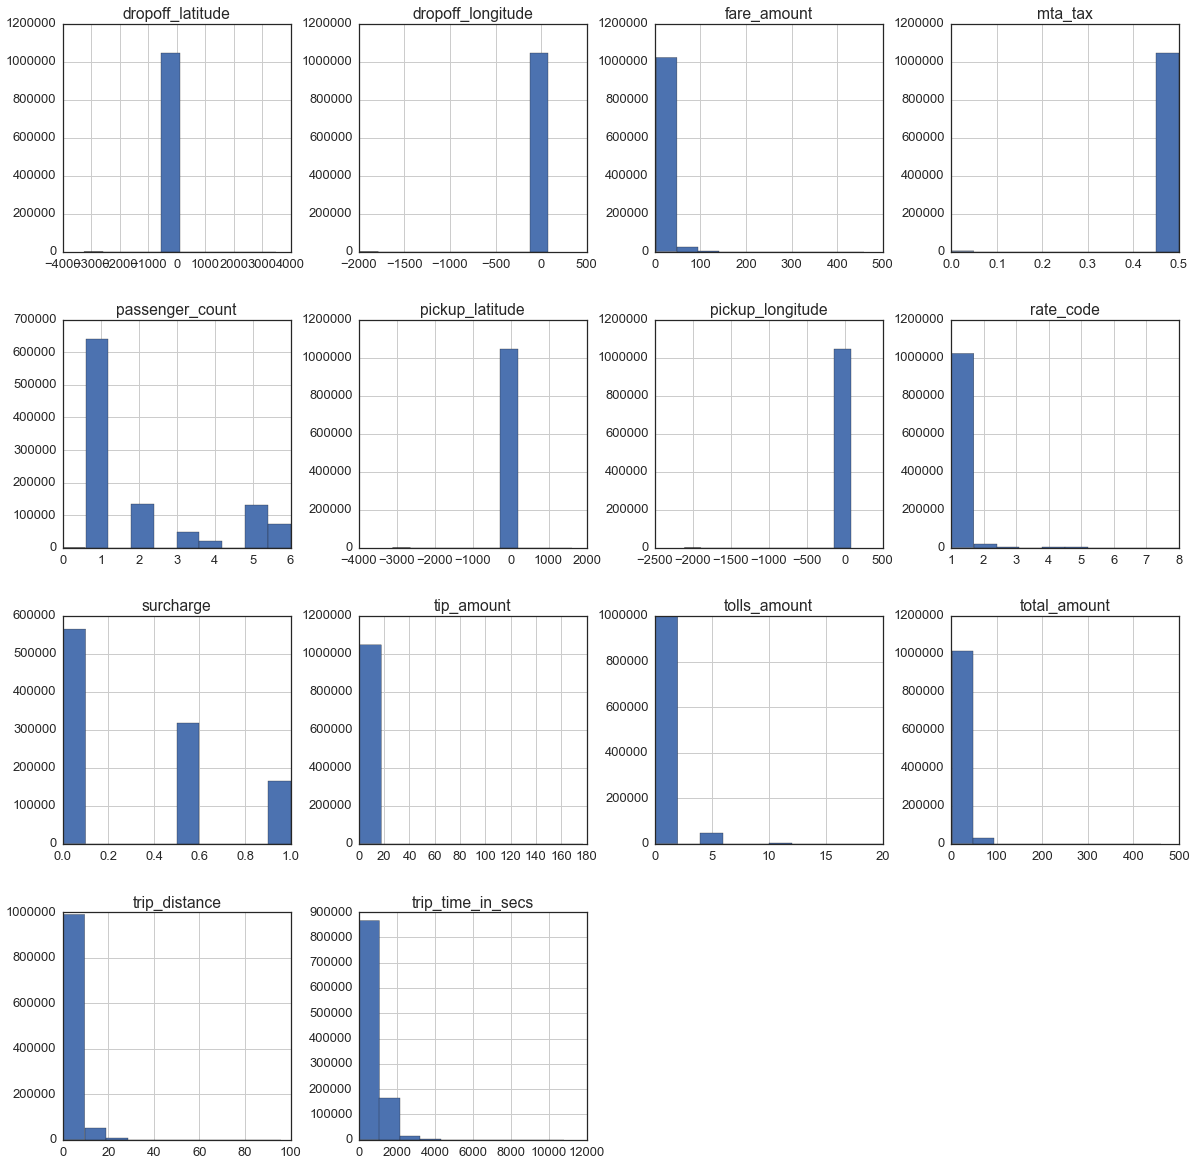

In [21]:
# fig, axes = plt.subplots(nrows=4, ncols=4)
# fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

# plt.show()

df.hist(bins=10,figsize=(20, 20))
# alpha=.4

### Boxplots analyzing tip amount and total amount based on payment type
>Most customers pay with card or cash.

>Unfortunately, I wasnt able to figure out how to adjust the y-axis in order to provide a better scaled view of the boxplots. Still, the plots reveal that cash, card, and unknown payment types are the most common. It makes sense thought that discputed, no charge, and unknown payment types are a small minority.

OrderedDict([('tip_amount',
              <matplotlib.axes._subplots.AxesSubplot at 0x127b7fd0>),
             ('total_amount',
              <matplotlib.axes._subplots.AxesSubplot at 0x161c0358>)])

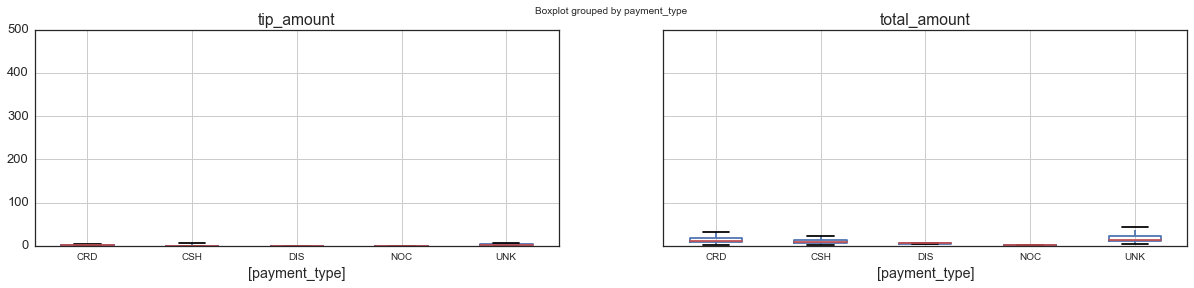

In [22]:
df.boxplot(return_type='axes',column=['tip_amount','total_amount'], by=['payment_type'],
           figsize=(20, 4))

### Large correlation matrix for each variable

In [23]:
df.corr()

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
fare_amount,1.000000,-0.078412,-0.274294,0.523503,0.590349,0.984036,0.517455,-0.006359,0.795389,0.893422,0.041237,-0.022801,0.049840,-0.024413
surcharge,-0.078412,1.000000,0.036136,-0.020360,-0.079100,-0.046398,-0.094818,-0.000817,-0.055554,-0.052572,-0.013420,0.007966,-0.015069,0.007753
mta_tax,-0.274294,0.036136,1.000000,-0.142131,-0.297238,-0.279742,-0.584108,0.014763,-0.050020,-0.111385,-0.092872,0.054143,-0.103545,0.051187
tip_amount,0.523503,-0.020360,-0.142131,1.000000,0.387059,0.650845,0.271286,-0.008246,0.429388,0.485677,0.027518,-0.014850,0.034010,-0.016682
tolls_amount,0.590349,-0.079100,-0.297238,0.387059,1.000000,0.654375,0.363729,-0.003867,0.418436,0.596532,0.000300,0.001414,0.005952,-0.003025
total_amount,0.984036,-0.046398,-0.279742,0.650845,0.654375,1.000000,0.512048,-0.007143,0.780787,0.889636,0.038871,-0.021257,0.047692,-0.023363
rate_code,0.517455,-0.094818,-0.584108,0.271286,0.363729,0.512048,1.000000,-0.023357,0.181440,0.308257,0.144505,-0.084255,0.165075,-0.082141
passenger_count,-0.006359,-0.000817,0.014763,-0.008246,-0.003867,-0.007143,-0.023357,1.000000,0.000586,0.007635,-0.002057,0.001298,-0.002595,-0.000908
trip_time_in_secs,0.795389,-0.055554,-0.050020,0.429388,0.418436,0.780787,0.181440,0.000586,1.000000,0.803898,-0.030728,0.019161,-0.037347,0.018865
trip_distance,0.893422,-0.052572,-0.111385,0.485677,0.596532,0.889636,0.308257,0.007635,0.803898,1.000000,-0.020112,0.013105,-0.024312,0.011937


### Scatterplots colored based on payment type
>These early plots were meant to give a feel for how some of the data features relate to each other. Trip distance and fare amount appear to be correlated as well as trip distance and tip amount.

>The payment distribution is dominated by card transactions, then cash. Unknown payments in yellow are also prevalent.

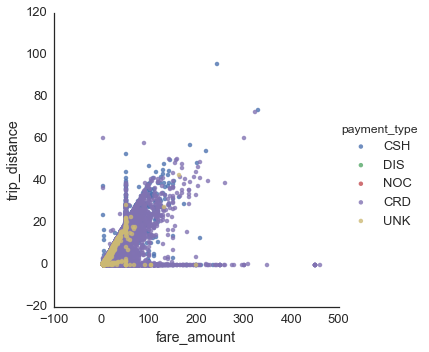

In [25]:
sns.lmplot('fare_amount', 'trip_distance', 
           data=df,
           hue='payment_type', fit_reg=False);

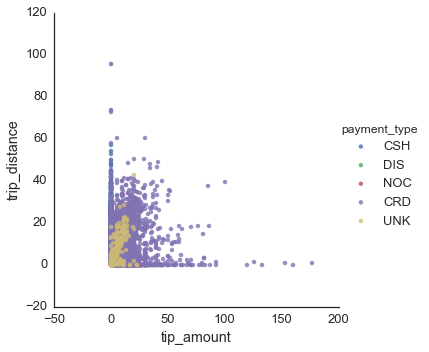

In [26]:
sns.lmplot('tip_amount', 'trip_distance', 
           data=df,
           hue='payment_type', fit_reg=False);

In [7]:
#Tip amount seems to have a small negative linear relationship regarding passenger count and tip amount.
#Single riders tip more, and they tip more frequently.

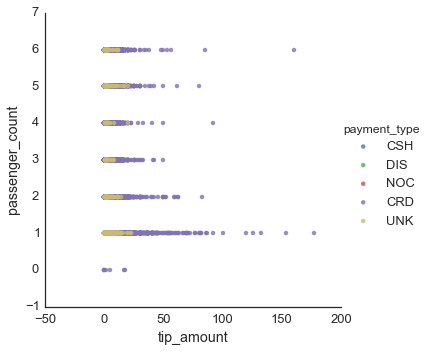

In [27]:
sns.lmplot('tip_amount', 'passenger_count', 
           data=df,
           hue='payment_type', fit_reg=False);

### Barplot and boxplot comparing the competing vendors
>For future analysis, it's important to note that the services provided by the two vendors likely differ in some ways. While they tend to measure the same metrics, the way they do it may vary and result in differing outcomes depending on which service is used to record cab ride information.

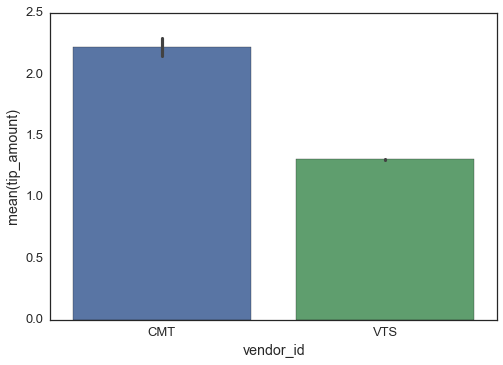

In [28]:
sns.barplot(x='vendor_id', y='tip_amount', 
            data=df);

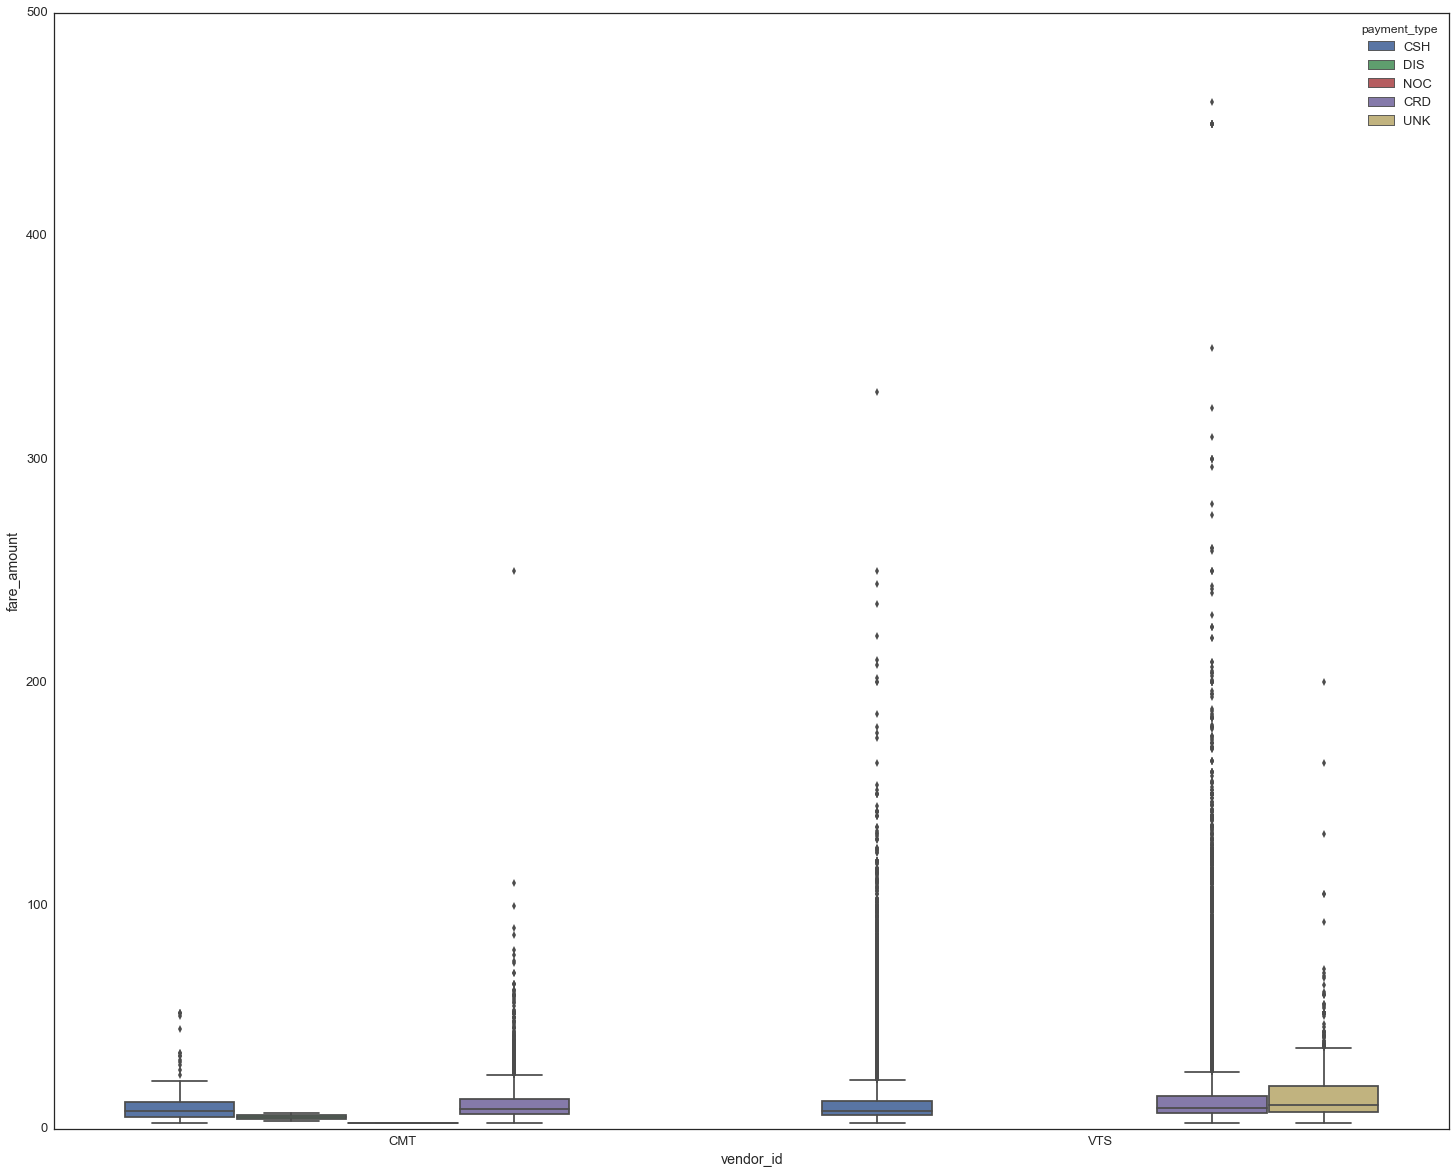

In [33]:
f, ax = plt.subplots(figsize=(25, 20))
sns.boxplot(x='vendor_id', y='fare_amount', 
            data=df, hue='payment_type', ax =ax);

### This bar plot is composed of the total amount due for a complete taxi ride, with a sample of 50 rides since it's too slow and messy to compute and display more points.
>You can see that aside 6-10 high tips, the tip distribution for this sample lies around 10 dollars.

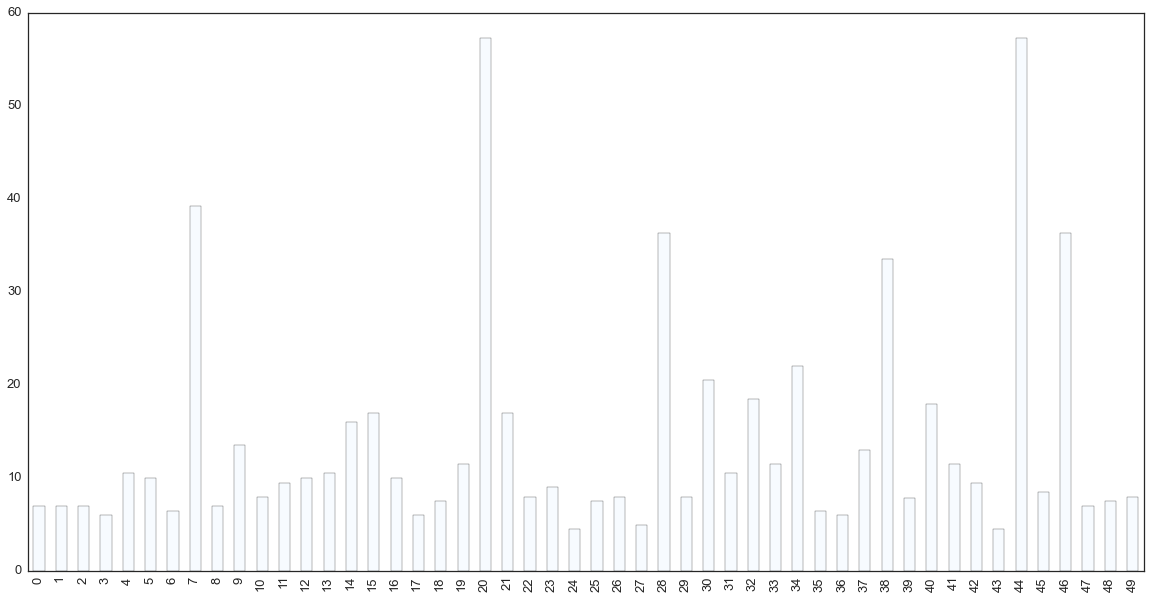

In [29]:
dd = df.total_amount
dd = dd[:50]
plt.figure()
dd.plot(kind='bar', figsize=(20,10), colormap='Blues',use_index=False)

### According to the pearson score in the scatter/hist plot below, tip amount and fare amount are moderately correlated wwith a score of .52
>This outcome makes sense intuitively because you would expect that much like tipping a waiter/waitress, the tip should be a percentage of the total bill. So, larger fare should equal larger tip. While this is what we might expect, it looks like there are 3 groups in this plot: one that has low fare amount but high tips, one that looks like tips are a representative percent of the total fare, and another group who appears to pay no tip at all despite having a large fare amount.

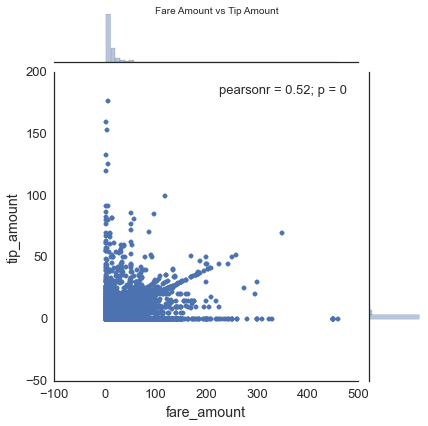

In [33]:
sns.jointplot(x='fare_amount', y='tip_amount', data=df);

plt.suptitle("Fare Amount vs Tip Amount")

In [8]:
#The following pair plot helps make patterns visible and reveals correlations in a way that makes it easy to compare
#variables.

ERROR! Session/line number was not unique in database. History logging moved to new session 233


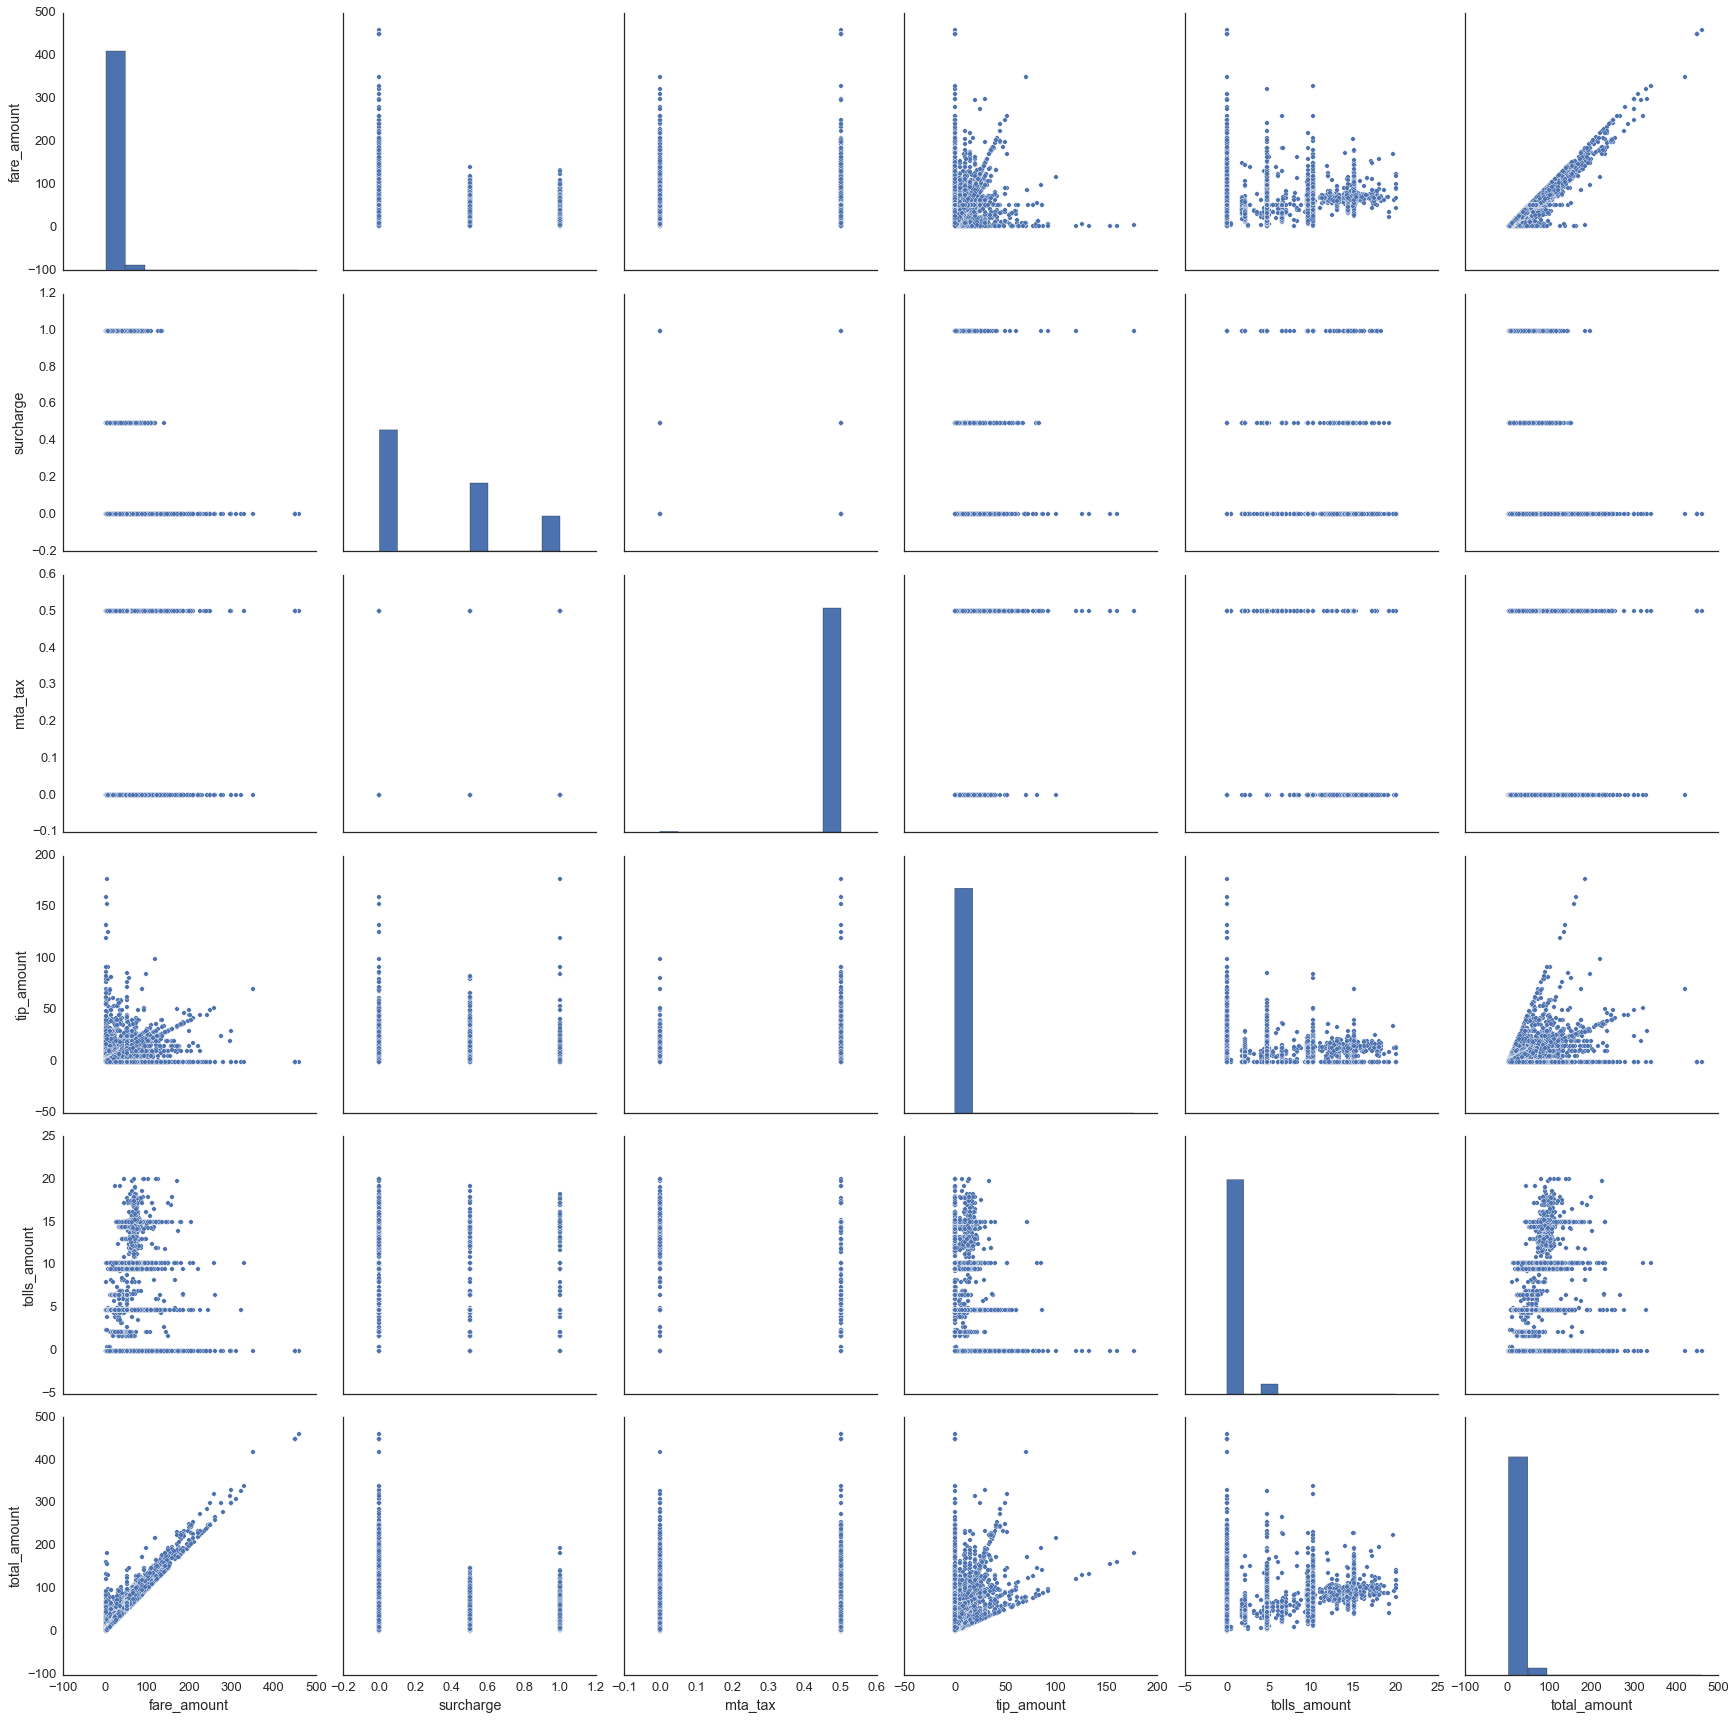

In [35]:


sns.pairplot(df, vars=['fare_amount', 'surcharge', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount'], 
             size=4);

### This scatterplot with a regression line shows a negative correlation between number of passengers and fare amount.
>Perhaps people travel shorter distances when traveling with one or more person, and single travelers tend to travel further, which may result in higher fares. As noted from previous scatterplot relationships, it would appear that single passengers also tend to tipe more frequently and give more.

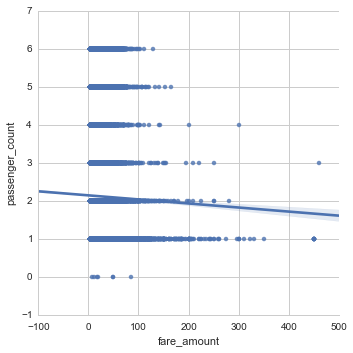

In [38]:
sns.lmplot(x='fare_amount', y='passenger_count', 
           data=df, fit_reg=True, x_jitter=.1);